MAJOR PROJECT - EXPLORE DATA,STATISTICAL METHODS,VISUALIZATION OF A HR DATASET

In [5]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/HR analytics.xlsx - Sheet1.csv'  # Update this with the path of your CSV file
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand the structure
print(data.head())
total_entries = len(data)
print("Total number of entries in the dataset:", total_entries)


               Name  Gender   Department     Salary          Loc     Rating
0      Ches Bonnell    Male        Sales   $88,050      Bellevue  Very Good
1  Garwin Peasegood  Female  Engineering   $68,220      Bellevue       Good
2   Sidoney Yitzhok  Female          NaN  $118,440    Wellington  Not Rated
3  Saunders Blumson    Male        Legal   $56,370   Los Angeles  Very Good
4    Gardy Grigorey  Female      Support  $107,090   Los Angeles       Poor
Total number of entries in the dataset: 1015


# Objective 1: How many Males/Females are there in the entire organization?


In [3]:
# Objective 1: How many Males/Females are there in the entire organization?
gender_count = data['Gender'].value_counts()
print("Gender Count:\n", gender_count)

Gender Count:
 Gender
Male      544
Female    471
Name: count, dtype: int64


# Objective 2: How many Males/Females are there in each department or each location?

In [6]:
gender_department = data.groupby(['Department', 'Gender']).size().unstack(fill_value=0)
gender_location = data.groupby(['Loc', 'Gender']).size().unstack(fill_value=0)
print("\nGender Distribution by Department:\n", gender_department)
print("\nGender Distribution by Location:\n", gender_location)


Gender Distribution by Department:
 Gender                    Female  Male
Department                            
Accounting                    30    42
Business Development          42    42
Engineering                   38    44
Human Resources               44    42
Legal                         36    56
Marketing                     33    36
Product Management            42    50
Research and Development      39    39
Sales                         38    45
Services                      42    42
Support                       37    47
Training                      38    43

Gender Distribution by Location:
 Gender       Female  Male
Loc                      
Bellevue        127   143
Los Angeles     176   209
Wellington      168   192


# Objective 3: For which department is the average pay highest?


In [8]:
# Convert 'Salary' column to numeric, removing '$' and ',' characters
data['Salary'] = data['Salary'].str.replace('$', '').str.replace(',', '').astype(float)

avg_pay_department = data.groupby('Department')['Salary'].mean().idxmax()
max_avg_pay_department = data.groupby('Department')['Salary'].mean().max()
print("\nDepartment with the highest average pay:", avg_pay_department)
print("Average Pay for this department:", max_avg_pay_department)


Department with the highest average pay: Business Development
Average Pay for this department: 74335.95238095238


# Objective 4: For which location is the average pay highest?

In [9]:
avg_pay_location = data.groupby('Loc')['Salary'].mean().idxmax()
max_avg_pay_location = data.groupby('Loc')['Salary'].mean().max()
print("\nLocation with the highest average pay:", avg_pay_location)
print("Average Pay for this location:", max_avg_pay_location)


Location with the highest average pay: Bellevue
Average Pay for this location: 72201.96296296296


# Objective 5: Percentage of employees by rating categories

In [10]:
total_employees = len(data)

rating_good = data[data['Rating'].isin(['Good', 'Very Good'])].shape[0]
rating_poor = data[data['Rating'].isin(['Poor', 'Very Poor'])].shape[0]
rating_average = data[data['Rating'] == 'Average'].shape[0]

print("\nPercentage of employees with Good & Very Good rating: {:.2f}%".format((rating_good / total_employees) * 100))
print("Percentage of employees with Poor & Very Poor rating: {:.2f}%".format((rating_poor / total_employees) * 100))
print("Percentage of employees with Average rating: {:.2f}%".format((rating_average / total_employees) * 100))



Percentage of employees with Good & Very Good rating: 27.98%
Percentage of employees with Poor & Very Poor rating: 18.82%
Percentage of employees with Average rating: 45.42%


# Objective 6: Compute gender pay gap for each department

In [11]:
# Pay gap = (Male average salary - Female average salary) / Male average salary
pay_gap_department = data.groupby(['Department', 'Gender'])['Salary'].mean().unstack()
pay_gap_department['Pay Gap'] = (pay_gap_department['Male'] - pay_gap_department['Female']) / pay_gap_department['Male']
print("\nGender Pay Gap by Department:\n", pay_gap_department[['Pay Gap']])


Gender Pay Gap by Department:
 Gender                     Pay Gap
Department                        
Accounting                0.069793
Business Development      0.039171
Engineering              -0.142307
Human Resources           0.155955
Legal                     0.085217
Marketing                -0.054077
Product Management        0.043954
Research and Development  0.001208
Sales                     0.073050
Services                  0.022893
Support                   0.099512
Training                 -0.019555


# Objective 7: Compute gender pay gap for each location

In [12]:
pay_gap_location = data.groupby(['Loc', 'Gender'])['Salary'].mean().unstack()
pay_gap_location['Pay Gap'] = (pay_gap_location['Male'] - pay_gap_location['Female']) / pay_gap_location['Male']
print("\nGender Pay Gap by Location:\n", pay_gap_location[['Pay Gap']])


Gender Pay Gap by Location:
 Gender        Pay Gap
Loc                  
Bellevue     0.066417
Los Angeles  0.025481
Wellington   0.030838


Additional Exercises:
1. Use visualization to understand & explore data

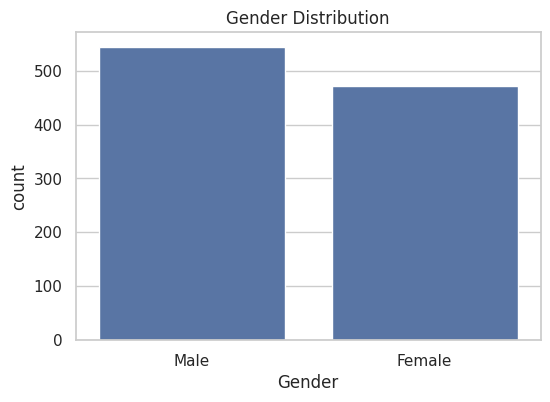

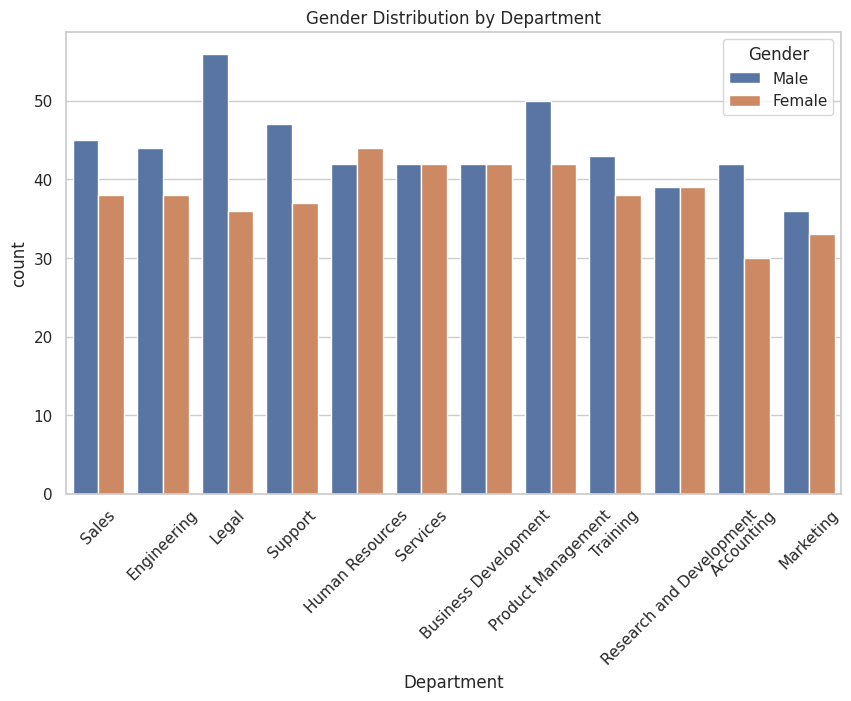

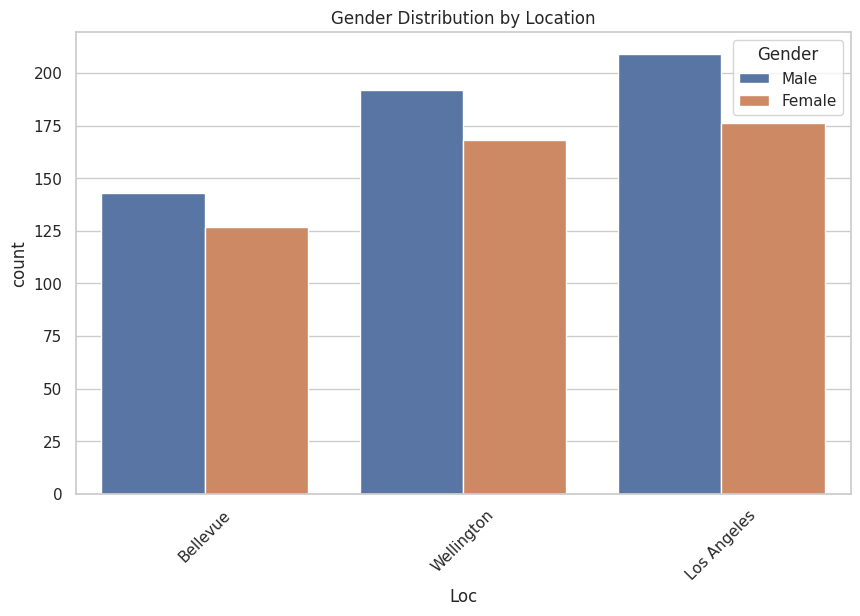

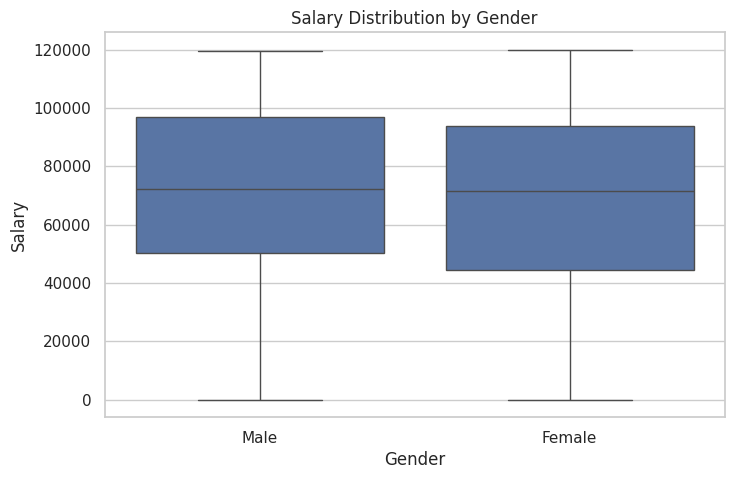

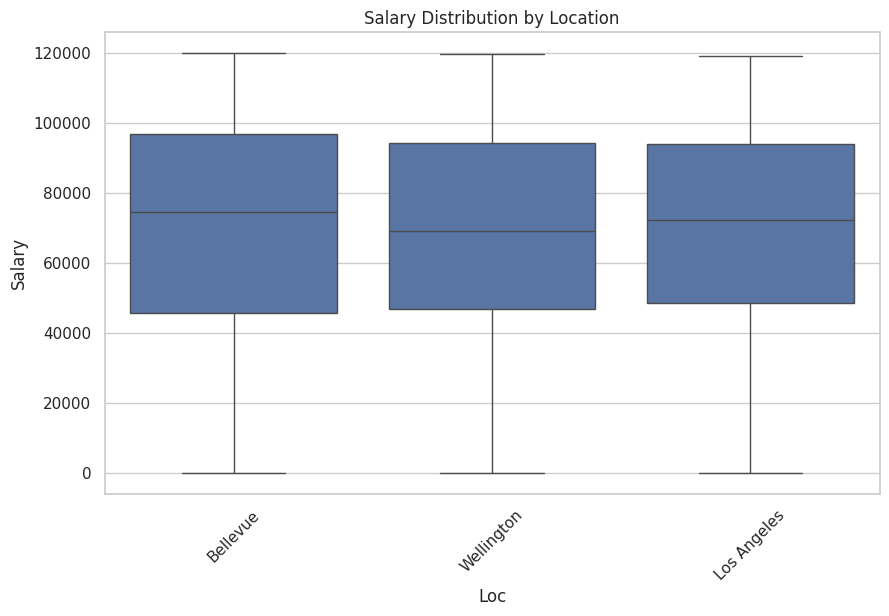

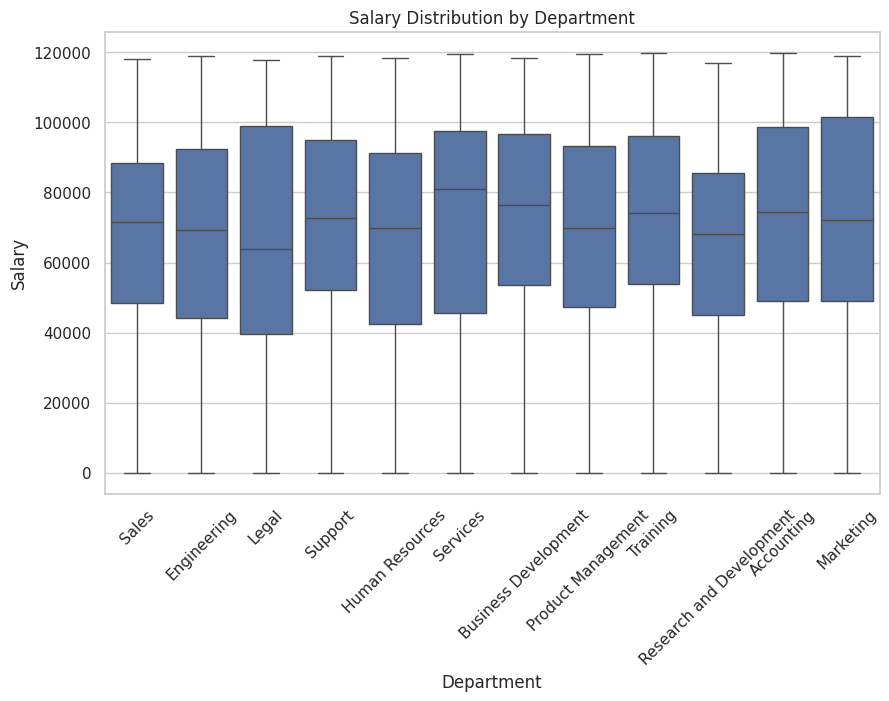

In [13]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for better visuals
sns.set(style="whitegrid")

# Visualize gender distribution in the organization
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Gender')
plt.title('Gender Distribution')
plt.show()

# Visualize gender distribution by department
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='Department', hue='Gender')
plt.title('Gender Distribution by Department')
plt.xticks(rotation=45)
plt.show()

# Visualize gender distribution by location
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='Loc', hue='Gender')
plt.title('Gender Distribution by Location')
plt.xticks(rotation=45)
plt.show()

# Visualize salary distribution by gender
plt.figure(figsize=(8,5))
sns.boxplot(data=data, x='Gender', y='Salary')
plt.title('Salary Distribution by Gender')
plt.show()

# Visualize salary distribution by location
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='Loc', y='Salary')
plt.title('Salary Distribution by Location')
plt.xticks(rotation=45)
plt.show()

# Visualize salary distribution by department
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='Department', y='Salary')
plt.title('Salary Distribution by Department')
plt.xticks(rotation=45)
plt.show()


Additional Exercises:
2. Use statistical methods to explore the relationship/association between the
variables

2.1 gender & location

In [14]:
from scipy.stats import chi2_contingency

# Gender & Location
gender_location_table = pd.crosstab(data['Gender'], data['Loc'])
chi2, p, dof, ex = chi2_contingency(gender_location_table)
print("Chi-Square Test for Gender & Location")
print("Chi2 Stat:", chi2, ", p-value:", p)

Chi-Square Test for Gender & Location
Chi2 Stat: 0.12713087564584682 , p-value: 0.9384127096067073


2.2 gender & department

In [15]:
# Gender & Department
gender_department_table = pd.crosstab(data['Gender'], data['Department'])
chi2, p, dof, ex = chi2_contingency(gender_department_table)
print("\nChi-Square Test for Gender & Department")
print("Chi2 Stat:", chi2, ", p-value:", p)


Chi-Square Test for Gender & Department
Chi2 Stat: 4.949409429919861 , p-value: 0.9335918602253642


2.3 gender & rating

In [16]:
# Gender & Rating
gender_rating_table = pd.crosstab(data['Gender'], data['Rating'])
chi2, p, dof, ex = chi2_contingency(gender_rating_table)
print("\nChi-Square Test for Gender & Rating")
print("Chi2 Stat:", chi2, ", p-value:", p)


Chi-Square Test for Gender & Rating
Chi2 Stat: 7.212547892600934 , p-value: 0.20530668786134748


2.4 gender & salary

In [17]:
from scipy.stats import ttest_ind

# Gender & Salary (T-test)
male_salary = data[data['Gender'] == 'Male']['Salary']
female_salary = data[data['Gender'] == 'Female']['Salary']
t_stat, p_val = ttest_ind(male_salary, female_salary)
print("\nT-test for Gender & Salary")
print("T-stat:", t_stat, ", p-value:", p_val)


T-test for Gender & Salary
T-stat: 1.4708666365025218 , p-value: 0.14163773320182504


2.5 location & salary

In [18]:
# Location & Salary (ANOVA test)
from scipy.stats import f_oneway
salary_by_location = [group['Salary'].values for name, group in data.groupby('Loc')]
f_stat, p_val = f_oneway(*salary_by_location)
print("\nANOVA for Location & Salary")
print("F-stat:", f_stat, ", p-value:", p_val)


ANOVA for Location & Salary
F-stat: 0.818639019110594 , p-value: 0.4413233248081302


2.6 department & salary

In [19]:
# Department & Salary (ANOVA test)
salary_by_department = [group['Salary'].values for name, group in data.groupby('Department')]
f_stat, p_val = f_oneway(*salary_by_department)
print("\nANOVA for Department & Salary")
print("F-stat:", f_stat, ", p-value:", p_val)


ANOVA for Department & Salary
F-stat: 0.670864949471528 , p-value: 0.7670526860672109
